Enter image URL or file path: https://media-cldnry.s-nbcnews.com/image/upload/t_fit-1500w,f_auto,q_auto:best/newscms/2019_23/2426541/180509-running-outdoors-al-1053.jpg


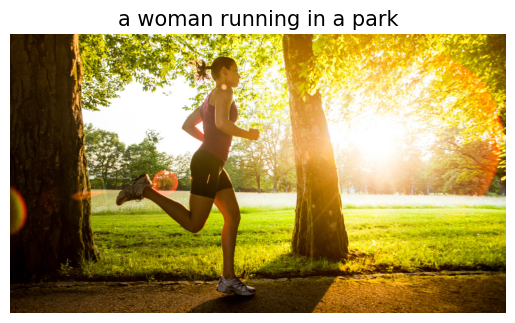

In [7]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import matplotlib.pyplot as plt
import requests
from io import BytesIO

# Load the processor and model
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

def generate_caption(image_path):
    # Check if the image path is a URL
    if image_path.startswith("http"):
        # Load image from URL
        response = requests.get(image_path)
        image = Image.open(BytesIO(response.content)).convert("RGB")  # Convert to RGB if needed
    else:
        # Load image from file system
        image = Image.open(image_path).convert("RGB")  # Convert to RGB if needed

    # Preprocess the image
    inputs = processor(images=image, return_tensors="pt")

    # Generate captions
    outputs = model.generate(**inputs)

    # Decode the generated captions
    caption = processor.decode(outputs[0], skip_special_tokens=True)
    return caption, image

# Example usage
image_path = input("Enter image URL or file path: ")
caption, image = generate_caption(image_path)

# Display the image with the caption
plt.imshow(image)
plt.title(caption, fontsize=15)
plt.axis('off')
plt.show()
